In [2]:
from joblib import load
import os

file = 'k5_1hiddenLs8wMax12dropoutRateNone.joblib'

NNet_prediction_list, used_hyperparameter_dict, country_list, pred_year_string = load(file)

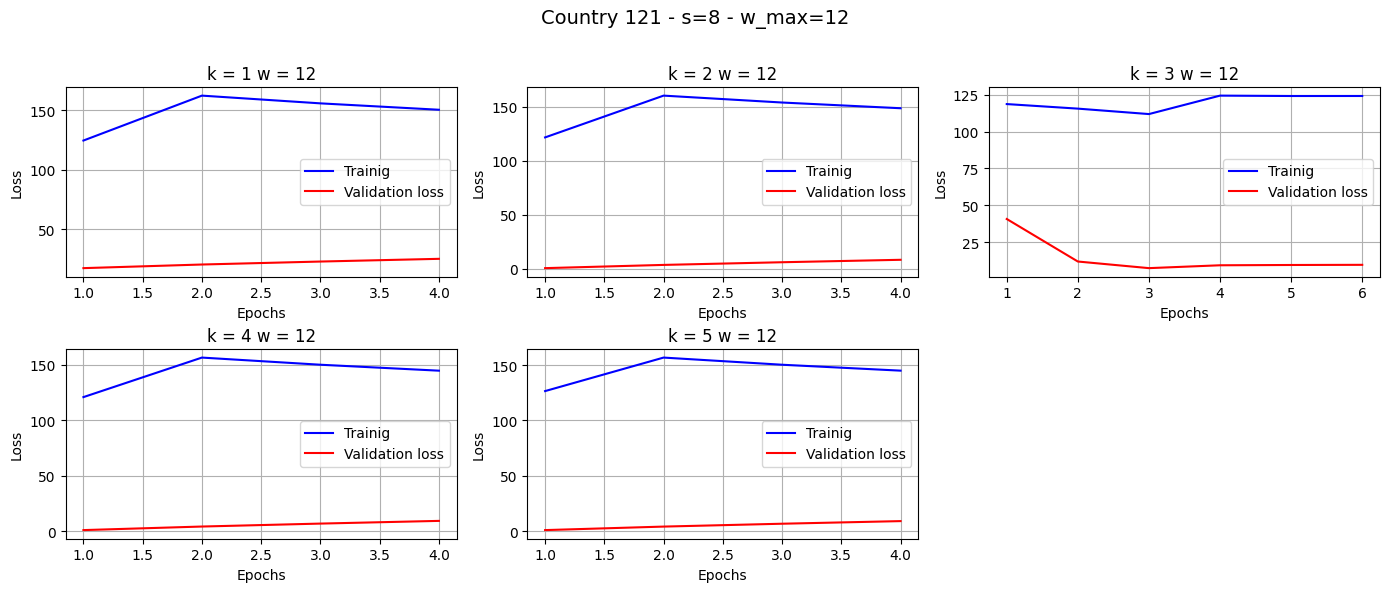

In [3]:
# maximal possible index: 93 
country_index = 0
country_to_plot = country_list[country_index]

w_max = used_hyperparameter_dict['wMax']
k_max = used_hyperparameter_dict['k']

import numpy as np
import matplotlib.pyplot as plt
i = 0 #zeile
j = 0 #spalte
# Erstelle eine Figur mit 1 Zeile und 3 Spalten für die beiden Plots nebeneinander und kleiner
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))

title_string = 'Country ' + str(NNet_prediction_list[country_index]['country_id']) + ' - s=' + str(NNet_prediction_list[country_index][pred_year_string][0]['s']) + ' - w_max=' + str(w_max)

for k in range(0, k_max):
    loss = NNet_prediction_list[country_index][pred_year_string][0]['loss'][k]
    val_loss = NNet_prediction_list[country_index][pred_year_string][0]['val_loss'][k]
    epochs = NNet_prediction_list[country_index][pred_year_string][0]['epochs'][k]
        
    axes[i][j].plot(epochs, loss, color='blue', label='Trainig')
    axes[i][j].plot(epochs, val_loss, color='red', label='Validation loss')
    axes[i][j].set_title('k = ' + str(k+1) + ' w = ' + str(NNet_prediction_list[country_index][pred_year_string][0]['w'][k]))
    axes[i][j].set_xlabel('Epochs')
    axes[i][j].set_ylabel('Loss')
    axes[i][j].legend()
    axes[i][j].grid(True)
    if j == 2:
        i += 1
        j = 0
    else:  
        j += 1

axes[1, 2].axis('off')  # Schalte Achsen für leere Plots aus

plt.tight_layout()  # Optimiere den Abstand zwischen den Subplots
plt.subplots_adjust(top=0.85)  # Mache Platz für den Haupttitel außerhalb des Plotbereichs
fig.suptitle(title_string, y=0.98, fontsize=14)
plt.show()

In [4]:
crps_values_valid = []
for country_data in NNet_prediction_list:
    country_crps_list = []
    for k in range(0,k_max):
        country_crps_list.append(min(country_data[pred_year_string][0]['val_loss'][k])) # min because of early stopping 'restore_best_weights=True'
    crps_values_valid.append(np.mean(country_crps_list))

mean_crps_valid = np.mean(crps_values_valid)


crps_values_test = []
for country_data in NNet_prediction_list:
    country_crps_list = []
    for k in range(0,k_max):
        country_crps_list.append(country_data[pred_year_string][0]['CRPS'][k])
    crps_values_test.append(np.mean(country_crps_list))

mean_crps_test = np.mean(crps_values_test)




print('Mean CRPS validate = ' + str(mean_crps_valid) + ' \\'+'\\')
print('Mean CRPS test = ' + str(mean_crps_test) + ' \\'+'\\')
print('Parameters data prep: ' + ' \\'+'\\' + 'wMax='+ str(used_hyperparameter_dict['wMax']) + ' validationSize='+str(used_hyperparameter_dict['relValidationSize']) + ' conflictTrapThresh=' + str(used_hyperparameter_dict['conflictTrapThresh']) + ' features='+ used_hyperparameter_dict['features'] + ' \\'+'\\')
print('Parameters NN: ' + ' \\'+'\\' + 'stoppingPatience=' + str(used_hyperparameter_dict['earlyStoppingPatience']) + ' learningRate='+str(used_hyperparameter_dict['learningRate'])+' numberHiddenLayers=' + used_hyperparameter_dict['numberHiddenLayers'] + ' numberNeurons=' + used_hyperparameter_dict['numberNeurons'] + ' dropoutRate=' + str(used_hyperparameter_dict['dropoutRate']))
print('')

Mean CRPS validate = 500.6528954207897 \\
Mean CRPS test = 565.6130874999999 \\
Parameters data prep:  \\wMax=12 validationSize=0.4 conflictTrapThresh=5 features=wdi \\
Parameters NN:  \\stoppingPatience=3 learningRate=0.1 numberHiddenLayers=1 numberNeurons=neuronshiddenlayer dropoutRate=None

